In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, r2_score


In [10]:
data = pd.read_csv(r"C:\my files\VS code\Project\car_data.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4017 non-null   object 
 1   year           4041 non-null   float64
 2   selling_price  4054 non-null   float64
 3   km_driven      4026 non-null   object 
 4   fuel           4042 non-null   object 
 5   seller_type    4056 non-null   object 
 6   transmission   4040 non-null   object 
 7   owner          4059 non-null   object 
dtypes: float64(2), object(6)
memory usage: 271.7+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4041.0,2013.276417,16.556865,1800.0,2011.0,2014.0,2016.0,3000.0
selling_price,4054.0,502655.413666,580492.958514,-120000.0,200000.0,350000.0,600000.0,8900000.0


In [10]:
data.head().T

,0,1,2,3,4
name,Maruti 800 AC,Maruti Wagon R LXI Minor,Hyundai Verna 1.6 SX,Datsun RediGO T Option,Honda Amaze VX i-DTEC
year,2007.0,NaN,2012.0,2017.0,2014.0
selling_price,NaN,135000.0,600000.0,250000.0,450000.0
km_driven,70000.0,50000.0,100000.0,46000.0,141000.0
fuel,Petrrol,Petorl,Deisel,Petorl,Diesl
seller_type,NaN,Indvidual,Indvidual,Indivudal,Indivudal
transmission,Manual,Manual,Manual,Manual,Manual
owner,First Owner,First Owner,First Owner,First Owner,Second Owner


In [9]:
data.tail().T

,4340,4341,4342,4343,4344
name,NaN,Renault KWID RXT BSIV,Hyundai Santro Xing GL Plus,Honda Amaze VX i-DTEC,Mahindra TUV 300 T8 AMT
year,2010.0,2019.0,2008.0,2014.0,2016.0
selling_price,165000.0,250000.0,120000.0,450000.0,730000.0
km_driven,80000.0,27000.0,41723.0,141000.0,60000.0
fuel,NaN,NaN,Petorl,Deisel,Diesl
seller_type,Indvidual,Indvidual,Indvidual,Indvidual,Indivudal
transmission,Manual,Manual,Manual,Manual,Automatic
owner,First Owner,First Owner,Second Owner,Second Owner,Second Owner


In [11]:
data.isna().sum()

name             328
year             304
selling_price    291
km_driven        319
fuel             303
seller_type      289
transmission     305
owner            286
dtype: int64

In [12]:
data.dropna(axis= 0 , inplace= True)
data = data.reset_index(drop=True)


In [13]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2449 non-null   object 
 1   year           2449 non-null   float64
 2   selling_price  2449 non-null   float64
 3   km_driven      2449 non-null   object 
 4   fuel           2449 non-null   object 
 5   seller_type    2449 non-null   object 
 6   transmission   2449 non-null   object 
 7   owner          2449 non-null   object 
dtypes: float64(2), object(6)
memory usage: 153.2+ KB


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2449 non-null   object 
 1   year           2449 non-null   float64
 2   selling_price  2449 non-null   float64
 3   km_driven      2449 non-null   object 
 4   fuel           2449 non-null   object 
 5   seller_type    2449 non-null   object 
 6   transmission   2449 non-null   object 
 7   owner          2449 non-null   object 
dtypes: float64(2), object(6)
memory usage: 153.2+ KB


In [16]:
data.columns = data.columns.str.strip()

In [17]:
print(data.columns)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [18]:
data["km_driven"] = pd.to_numeric(data["km_driven"], errors='coerce')
data = data.dropna(subset=["km_driven"])


In [19]:
lb = LabelEncoder()
data["transmission"] = lb.fit_transform(data["transmission"])

In [20]:
data['name'] = data['name'].astype(str)
data['brand'] = data['name'].str.split().str[0]


In [21]:
data['brand'] = data['name'].str.split().str[0]


In [22]:
data['car_age'] = 2025 - data['year']


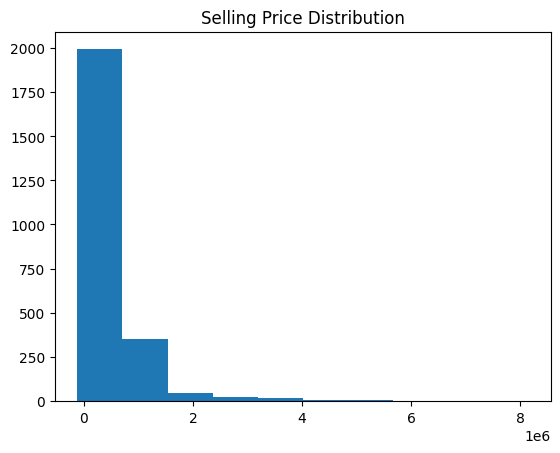

In [23]:
import matplotlib.pyplot as plt

plt.hist(data['selling_price'])
plt.title('Selling Price Distribution')
plt.show()


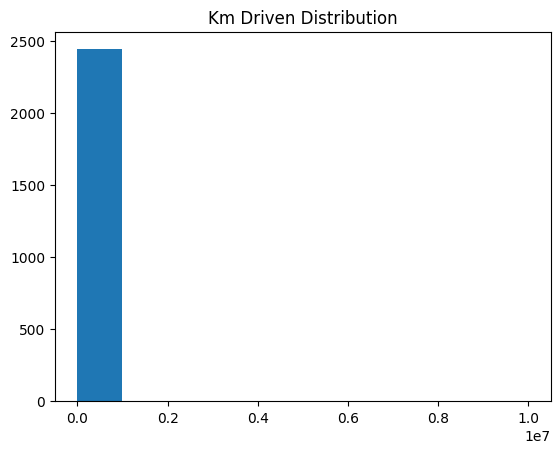

In [24]:
plt.hist(data['km_driven'])
plt.title('Km Driven Distribution')

plt.show()


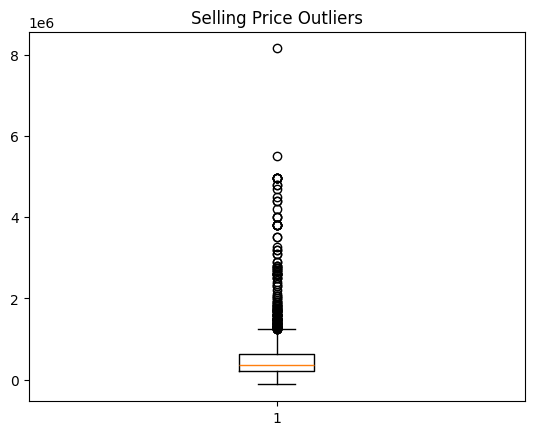

In [25]:
plt.boxplot(data['selling_price'])
plt.title('Selling Price Outliers')
plt.show()


In [26]:
[col for col in data.columns if 'fuel' in col]


['fuel']

In [27]:
print(data.columns.tolist())


['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'brand', 'car_age']


In [28]:
data.columns = data.columns.str.strip()


In [29]:
print(data.columns.tolist())


['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'brand', 'car_age']


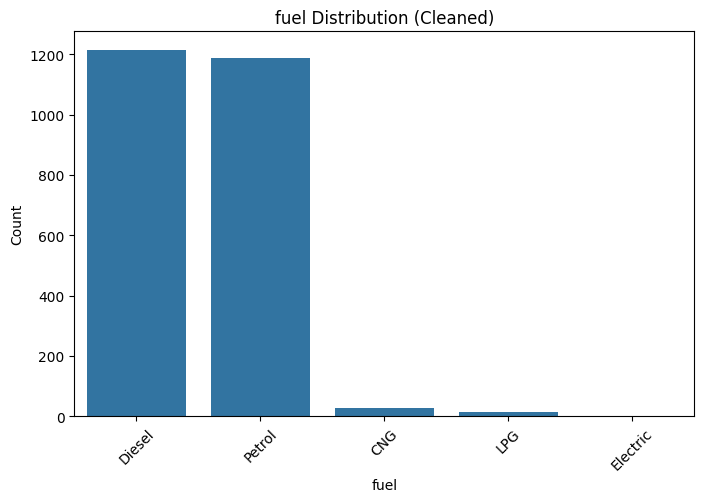

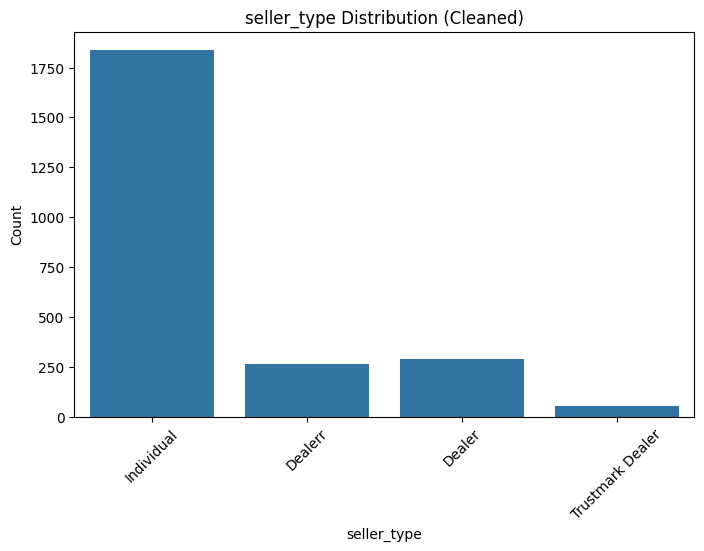

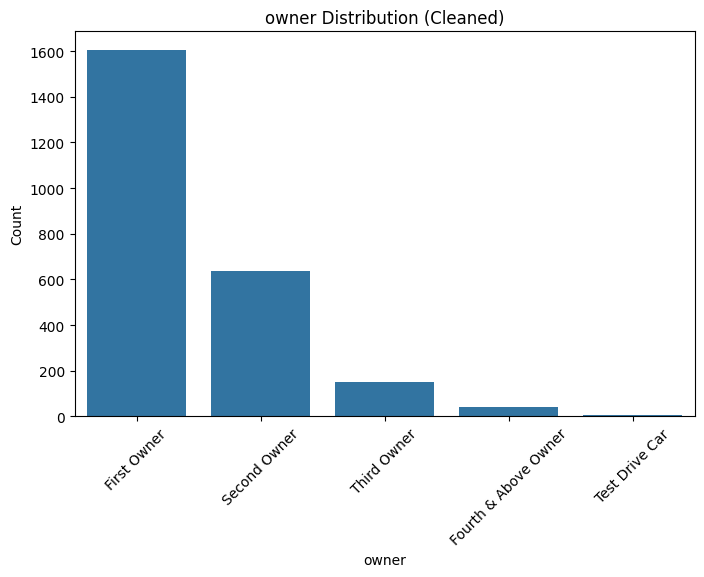

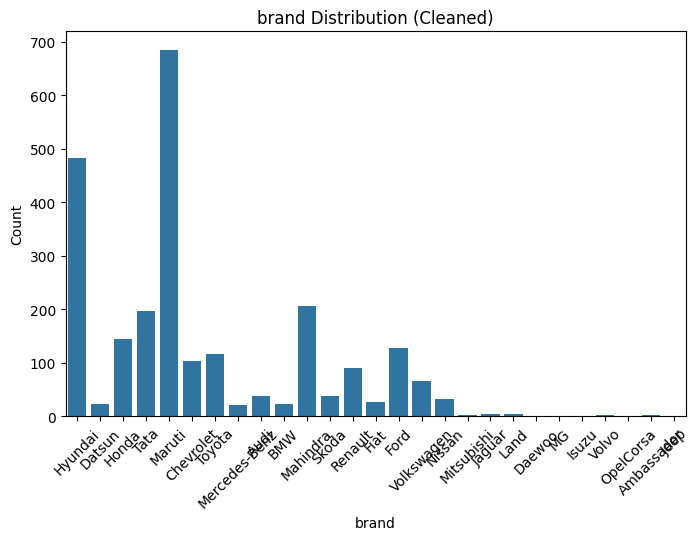

In [31]:
data.columns = data.columns.str.strip()

fuel_fix = {'Deisel': 'Diesel','Diesl': 'Diesel','Petorl': 'Petrol','Petrl': 'Petrol','Petrrol': 'Petrol'}
data['fuel'] = data['fuel'].replace(fuel_fix)

seller_fix = {'Deelar': 'Dealer','Indivudal': 'Individual','Indvidual': 'Individual'}
data['seller_type'] = data['seller_type'].replace(seller_fix)

categorical_cols = ['fuel', 'seller_type', 'owner', 'brand']  

for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=data[col])
    plt.title(f"{col} Distribution (Cleaned)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

exclude_cols = ['name']  
data_model = data.drop(columns=exclude_cols)

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  
)

data_encoded = ct.fit_transform(data_model)

 
encoded_cols = ct.named_transformers_['encoder'].get_feature_names_out(categorical_cols)

non_cat_cols = [col for col in data_model.columns if col not in categorical_cols]

all_cols = list(encoded_cols) + non_cat_cols

data_encoded_df = pd.DataFrame(data_encoded, columns=all_cols)




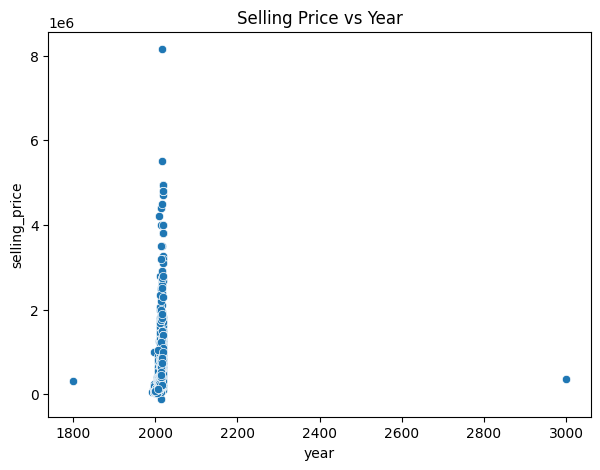

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x='year', y='selling_price')
plt.title('Selling Price vs Year')
plt.show()


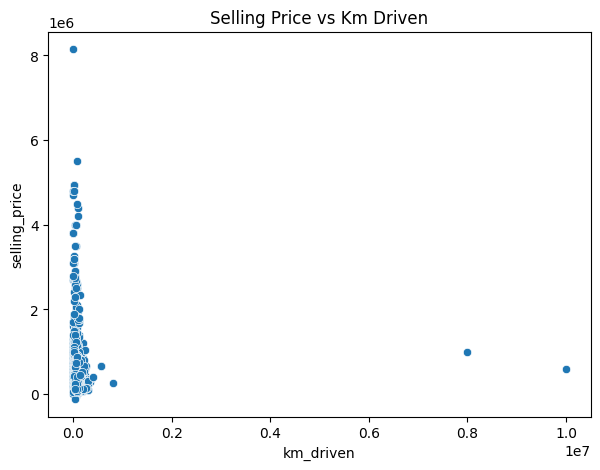

In [33]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x='km_driven', y='selling_price')
plt.title('Selling Price vs Km Driven')
plt.show()


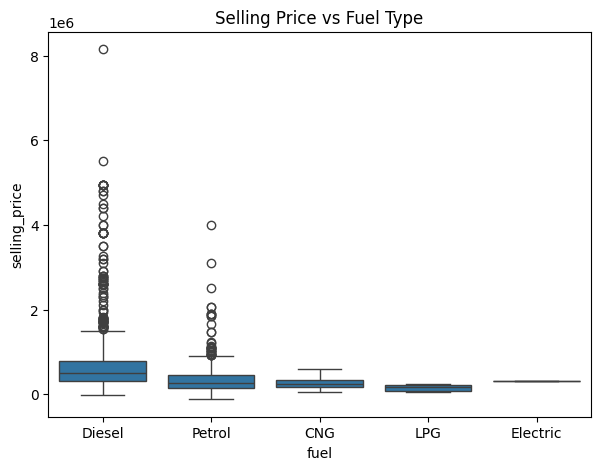

In [34]:
plt.figure(figsize=(7,5))
sns.boxplot(data=data, x='fuel', y='selling_price')
plt.title('Selling Price vs Fuel Type')
plt.show()


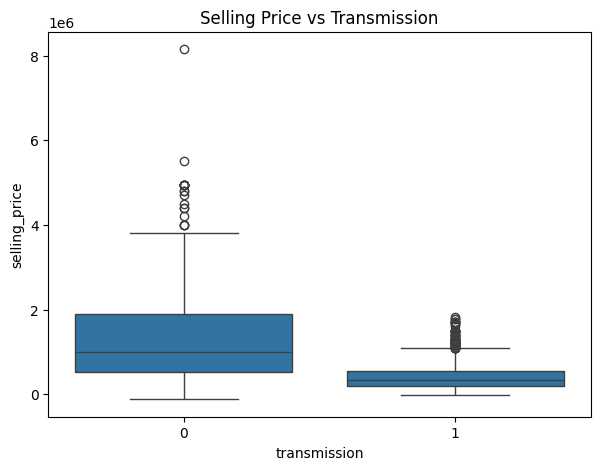

In [35]:
plt.figure(figsize=(7,5))
sns.boxplot(data=data, x='transmission', y='selling_price')
plt.title('Selling Price vs Transmission')
plt.show()


In [14]:
num_cols = data.select_dtypes(include=["number"]).columns
numeric_df = data[num_cols].dropna()
print("Numeric Columns:", num_cols)

Numeric Columns: Index(['year', 'selling_price'], dtype='object')


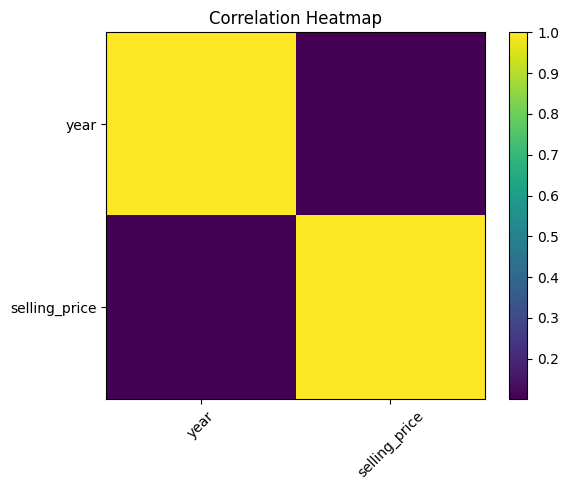

In [15]:
plt.figure(figsize=(6,5))
plt.imshow(numeric_df.corr(), cmap="viridis", aspect="auto")
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

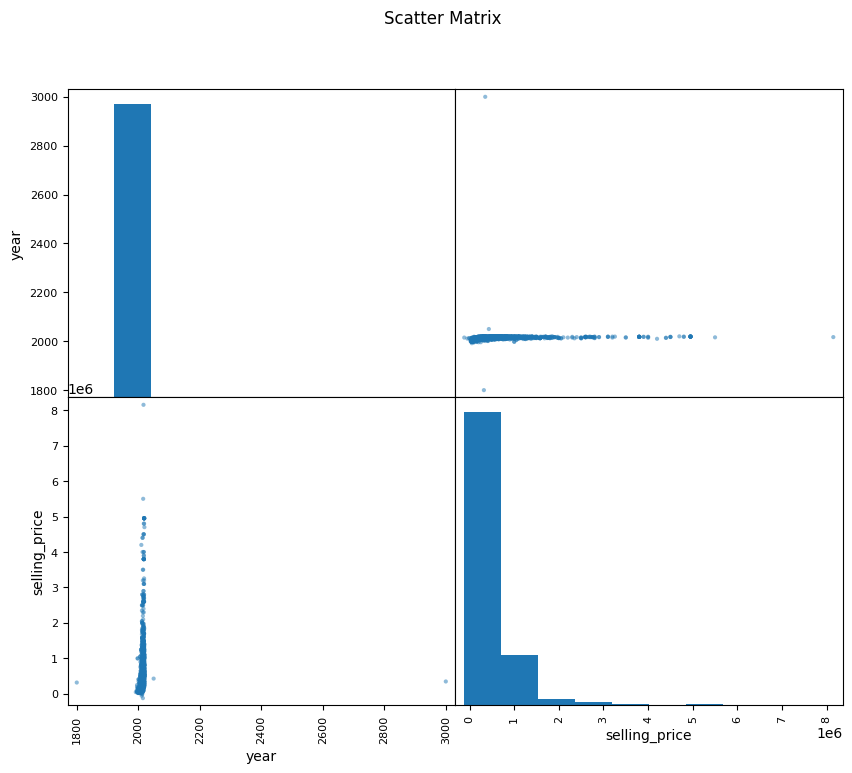

In [16]:
scatter_matrix(numeric_df, figsize=(10,8))
plt.suptitle("Scatter Matrix")
plt.show()

Explained Variance Ratio: [0.55048856 0.44951144]


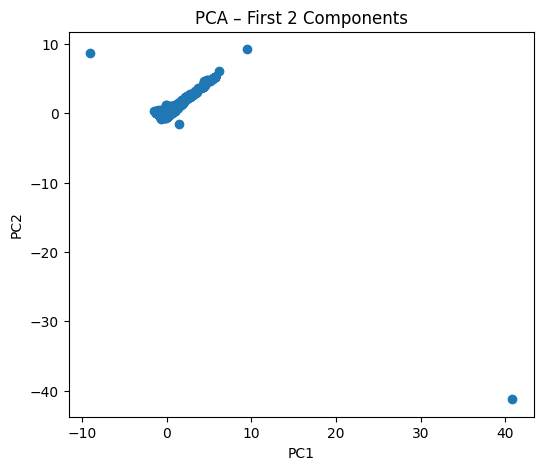

In [18]:
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_df)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(6,5))
plt.scatter(pcs[:,0], pcs[:,1])
plt.title("PCA – First 2 Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [21]:
if "selling_price" in data.columns:
    data = data.dropna(subset=["selling_price"])   

    y = data["selling_price"]
    X = data.drop(columns=["selling_price"])

    # encode object columns
    X = pd.get_dummies(X, drop_first=True)

    # fill missing
    X = X.fillna(X.median())

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R2:", r2_score(y_test, y_pred))



MAE: 171444.63322424667
R2: -1.7279742386264978


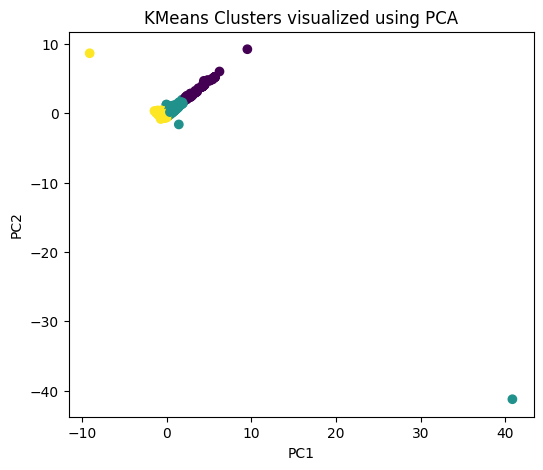

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)

plt.figure(figsize=(6,5))
plt.scatter(pcs[:,0], pcs[:,1], c=clusters)
plt.title("KMeans Clusters visualized using PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [23]:
print("====== BASIC DATA INSIGHTS ======")
print("Number of rows:", len(data))
print("Number of columns:", data.shape[1])
print("\nMissing values per column:\n", data.isna().sum())

num_cols = data.select_dtypes(include='number').columns
print("\nNumeric Description:\n", data[num_cols].describe())


====== BASIC DATA INSIGHTS ======
Number of rows: 4054
Number of columns: 8

Missing values per column:
 name             312
year             290
selling_price      0
km_driven        298
fuel             284
seller_type      266
transmission     287
owner            264
dtype: int64

Numeric Description:
               year  selling_price
count  3764.000000   4.054000e+03
mean   2013.297290   5.026554e+05
std      17.003512   5.804930e+05
min    1800.000000  -1.200000e+05
25%    2011.000000   2.000000e+05
50%    2014.000000   3.500000e+05
75%    2016.000000   6.000000e+05
max    3000.000000   8.900000e+06


In [24]:
print("\n====== CORRELATION INSIGHTS ======")
corr = data[num_cols].corr()
top_corr = corr["selling_price"].sort_values(ascending=False)
print("\nCorrelation with selling_price:\n", top_corr)


====== CORRELATION INSIGHTS ======

Correlation with selling_price:
 selling_price    1.000000
year             0.100977
Name: selling_price, dtype: float64


In [27]:
print("\n====== PCA INSIGHTS ======")
numeric_df = data[num_cols].dropna()
scaled = StandardScaler().fit_transform(numeric_df)

n_components = min(2, numeric_df.shape[1])

pca = PCA(n_components=n_components)
pca.fit(scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

if n_components >= 1:
    print("PC1 strong influence:", numeric_df.columns[np.argmax(abs(pca.components_[0]))])

if n_components >= 2:
    print("PC2 strong influence:", numeric_df.columns[np.argmax(abs(pca.components_[1]))])



====== PCA INSIGHTS ======
Explained Variance Ratio: [0.55048856 0.44951144]
PC1 strong influence: year
PC2 strong influence: selling_price


In [28]:
print("\n====== REGRESSION INSIGHTS ======")

reg_data = data.dropna(subset=["selling_price"]).copy()
y = reg_data["selling_price"]

X = reg_data.drop(columns=["selling_price"])
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("R² Score:", model.score(X_test, y_test))

coeffs = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\nTop predictors of selling_price:\n", coeffs.head(10))


====== REGRESSION INSIGHTS ======
R² Score: -1.7279742386264978

Top predictors of selling_price:
 km_driven_223000.0                                        2.323410e+07
name_Toyota Innova 2.5 G4 Diesel 7-seater                -2.300968e+07
name_Audi RS7 2015-2019 Sportback Performance             8.510327e+06
name_BMW X5 xDrive 30d xLine                              4.290839e+06
name_Audi A5 Sportback                                    3.956132e+06
name_Volvo XC 90 D5 Inscription BSIV                      3.880248e+06
name_Mercedes-Benz GL-Class 350 CDI Blue Efficiency       3.858003e+06
km_driven_6500.0                                          3.763329e+06
name_Mercedes-Benz S-Class S 350d Connoisseurs Edition    3.763329e+06
name_Land Rover Range Rover 4.4 Diesel LWB Vogue SE       3.738538e+06
dtype: float64


In [29]:
print("\n====== KMEANS CLUSTER INSIGHTS ======")

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)

cluster_df = numeric_df.copy()
cluster_df["cluster"] = clusters

print(cluster_df.groupby("cluster").mean())

print("\nCluster insights:")
for c in cluster_df["cluster"].unique():
    subset = cluster_df[cluster_df["cluster"] == c]
    print(f"\nCluster {c}:")
    print("Avg year:", round(subset["year"].mean(), 1) if "year" in subset else "N/A")
    print("Avg km:", round(subset["km_driven"].mean(), 1) if "km_driven" in subset else "N/A")
    print("Avg price:", round(subset["selling_price"].mean(), 1))


====== KMEANS CLUSTER INSIGHTS ======
                year  selling_price
cluster                            
0        2017.060976   3.501683e+06
1        2017.037400   8.311692e+05
2        2011.535365   2.650481e+05

Cluster insights:

Cluster 1:
Avg year: 2017.0
Avg km: N/A
Avg price: 831169.2

Cluster 2:
Avg year: 2011.5
Avg km: N/A
Avg price: 265048.1

Cluster 0:
Avg year: 2017.1
Avg km: N/A
Avg price: 3501682.9
